<h1><center>Coding Questions (15 Marks)</center></h1>

### Question 1 (Coding): K-Means Clustering (6 Marks)

Load the Iris dataset using sklearn.datasets.load_iris. For simplicity, use only the first two
features (sepal length and sepal width). Visualize the dataset as a scatter plot.

Tasks:
* Apply the K-Means algorithm to cluster the data with K=3.
* Plot the resulting clusters and centroids.
* Discuss the limitations of K-Means, particularly with this dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

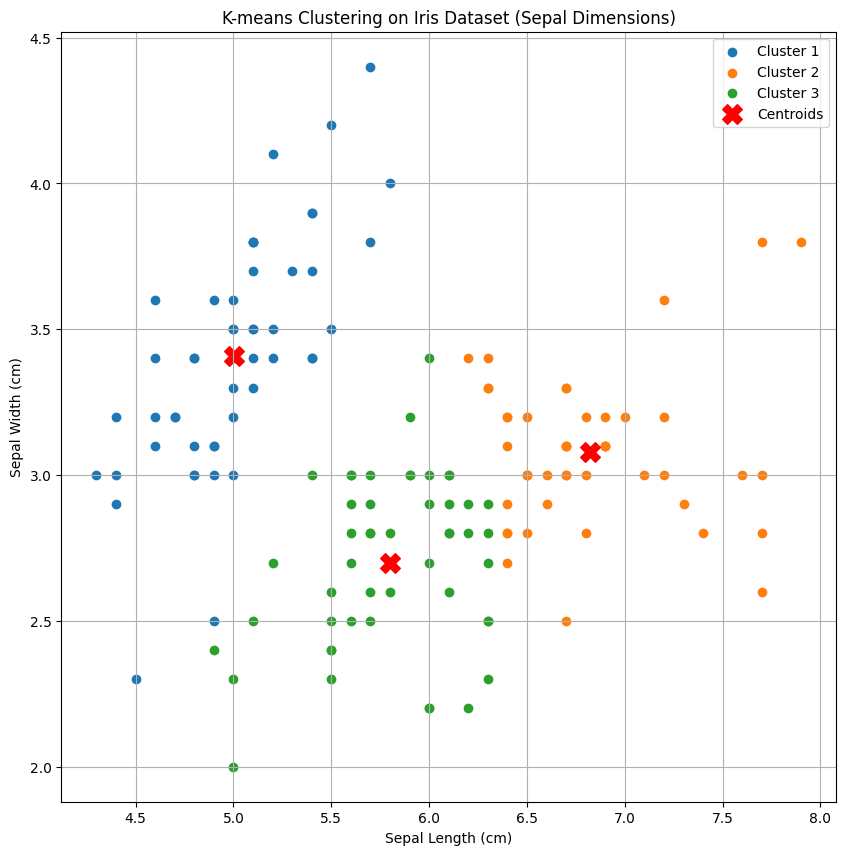

In [2]:
#Load iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

#Extract the sepal length and sepal width features
sepal_length = data.iloc[:,0].values
sepal_width = data.iloc[:,1].values
X = np.column_stack((sepal_length, sepal_width))

#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(X)

#Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#Plot the clusters and centroids
plt.figure(figsize=(10, 10))
for cluster in range(3):
    plt.scatter(X[labels==cluster,0], X[labels==cluster,1], label=f'Cluster {cluster+1}')
    
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

### Question 2 (Coding): DBSCAN on Iris Dataset (6 Marks)

We used the same data (iris data) for this question. Similar to the previous question, use only the
first two features (sepal length and sepal width) for simplicity.

Tasks:
* Apply the DBSCAN algorithm to the dataset (eps = 0.5, min_samples = 5) and plot the
clustering results as a scatter plot.
* Briefly explain how eps and min_samples influence the results.

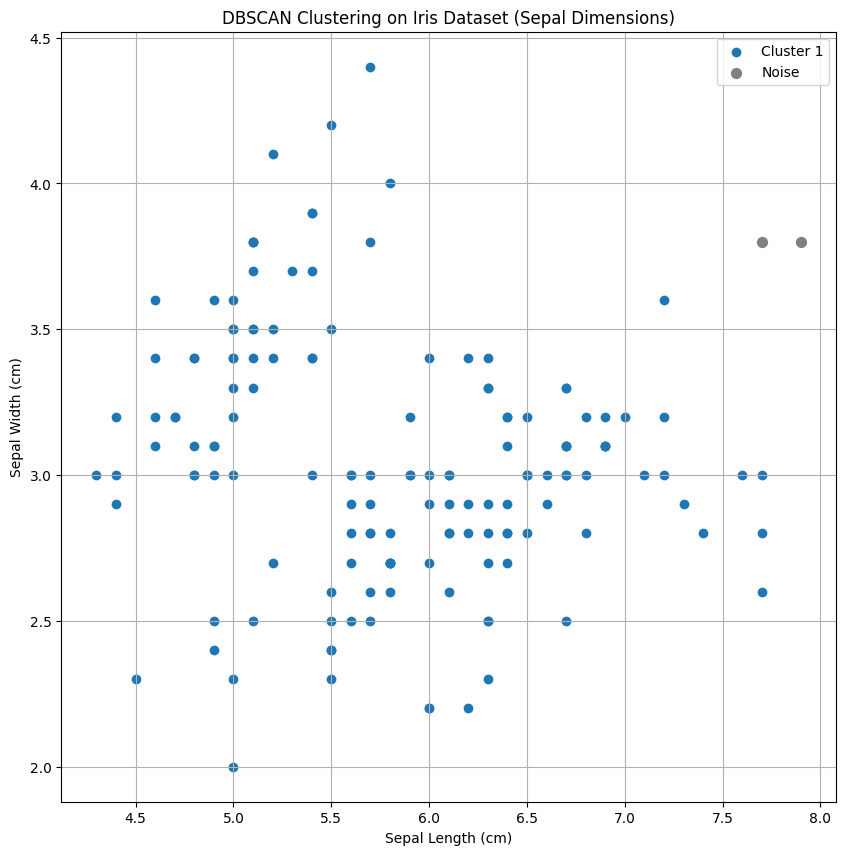

In [3]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Get unique labels (-1 represents noise)
unique_labels = set(labels)

# Plot the clusters
plt.figure(figsize=(10, 10))
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
    else:
        # Cluster points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

As shown in the plot above, only one cluster was found with DBSCAN clustering with the parameters $eps=0.5$ and $min\_samples = 5$. However, when we change the parameters to $eps=0.15$ and $min\_samples = 4$, we get three clusters, similar to the K-Means results, plus some data points identified as noise.

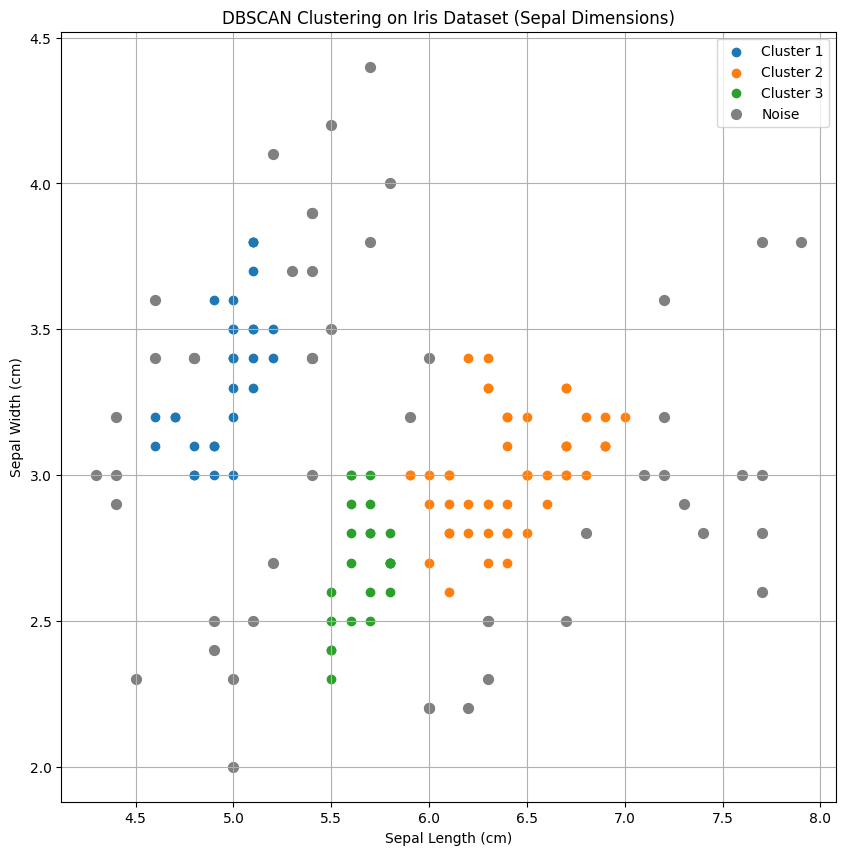

In [4]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=4)
labels = dbscan.fit_predict(X)

# Get unique labels (-1 represents noise)
unique_labels = set(labels)

# Plot the clusters
plt.figure(figsize=(10, 10))
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
    else:
        # Cluster points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

### Question 3: Comparing K-Means and DBSCAN Results (3 marks)

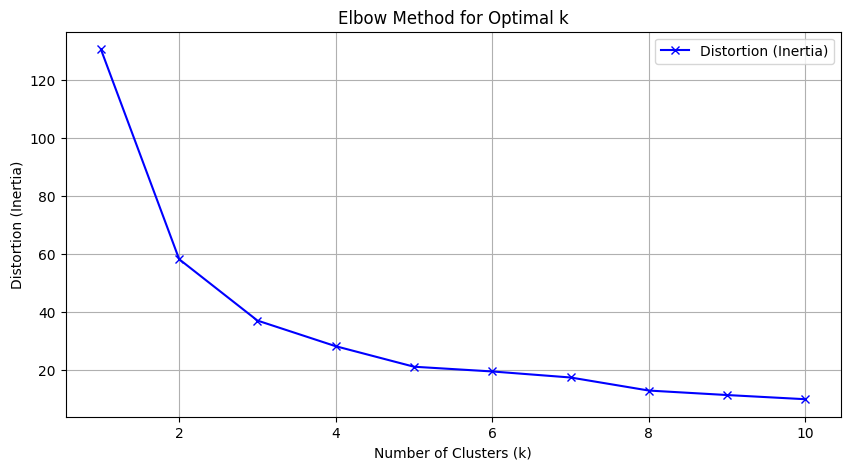

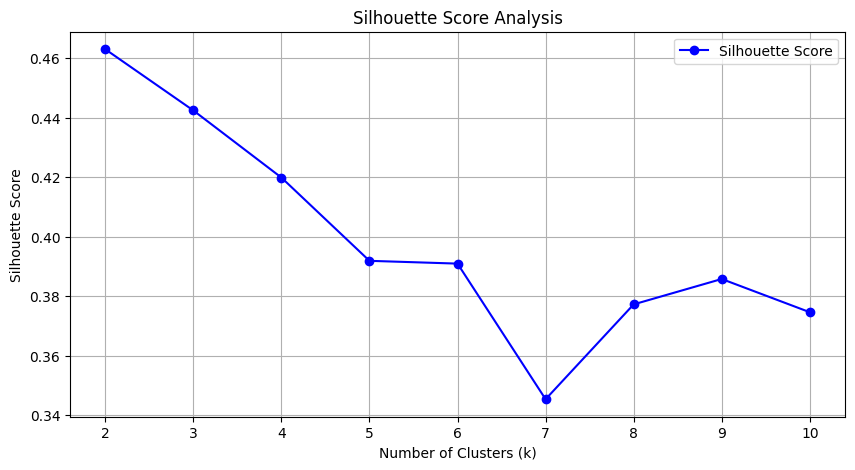

In [5]:
from sklearn.metrics import silhouette_score

# Define range for number of clusters
k_values = range(1, 11)

# List to store the distortion (inertia)
distortions = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=22)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid
    
    # Compute silhouette score only for k > 1
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # Silhouette score not defined for k = 1

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(k_values, distortions, 'bx-', label='Distortion (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.legend()
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values[1:], silhouette_scores[1:], 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid()
plt.legend()
plt.show()


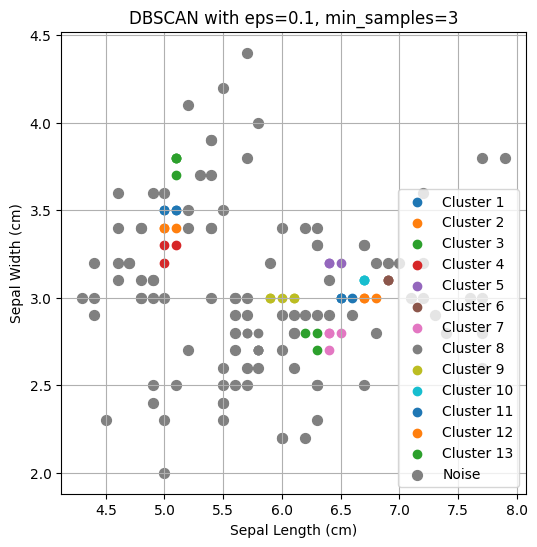

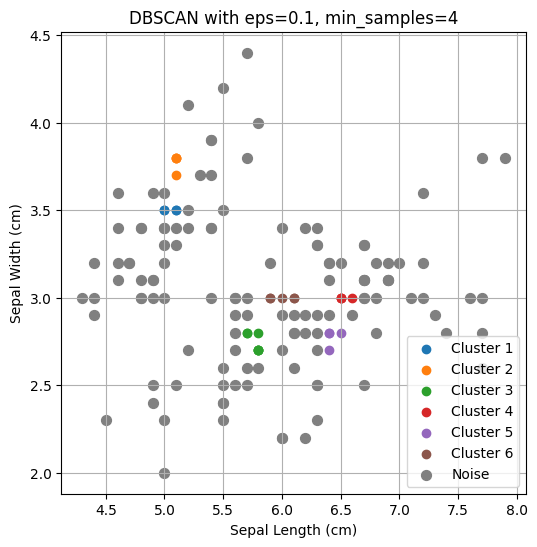

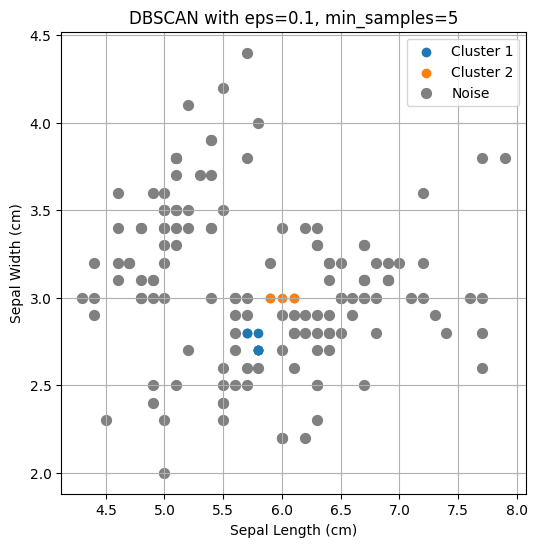

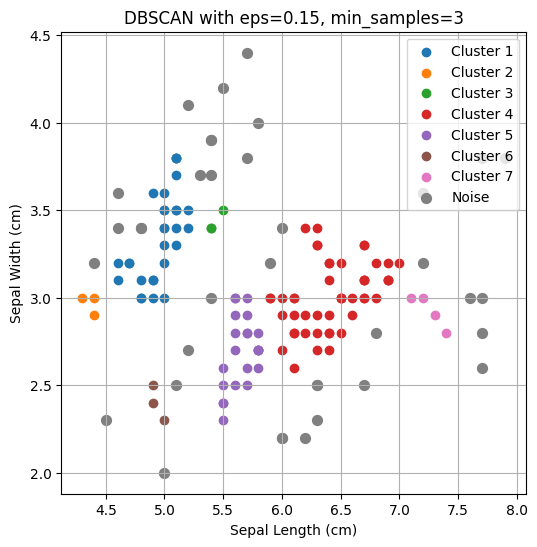

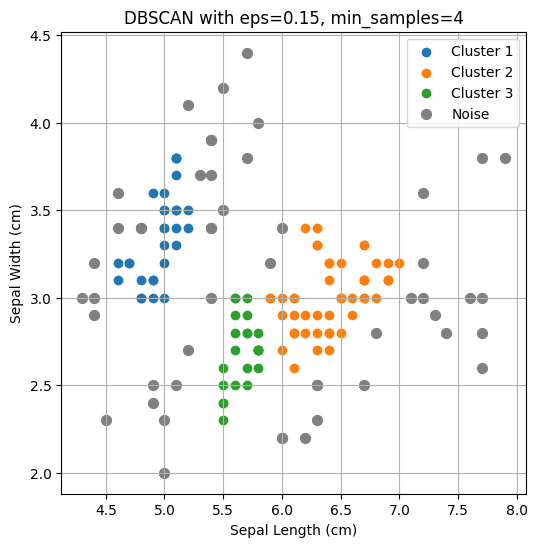

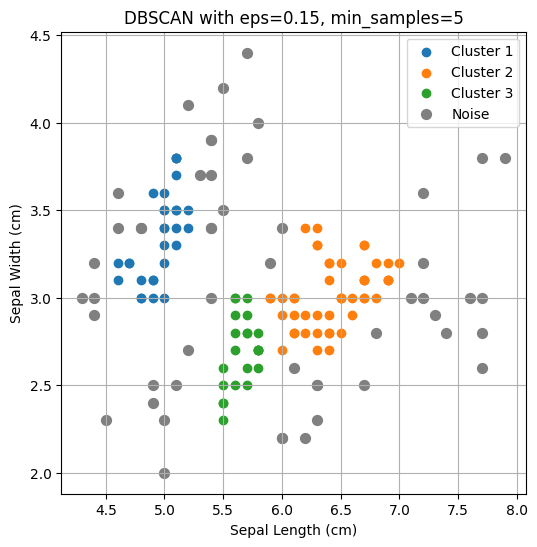

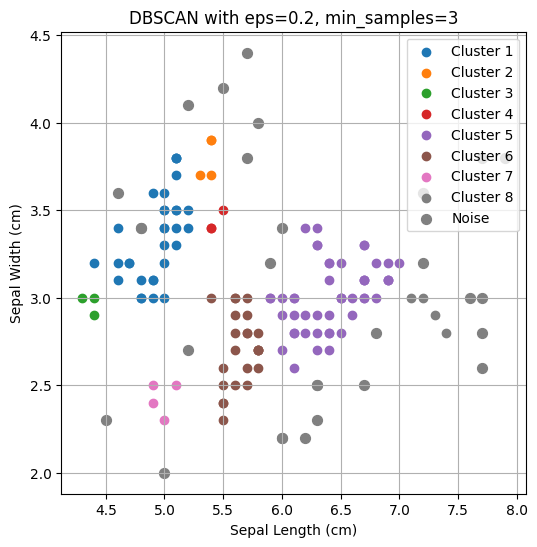

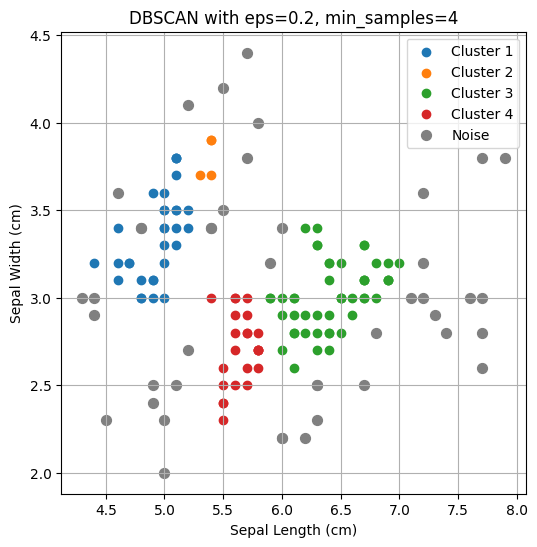

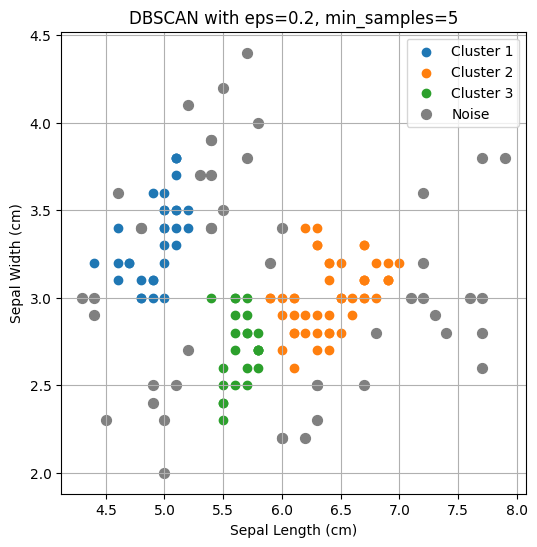

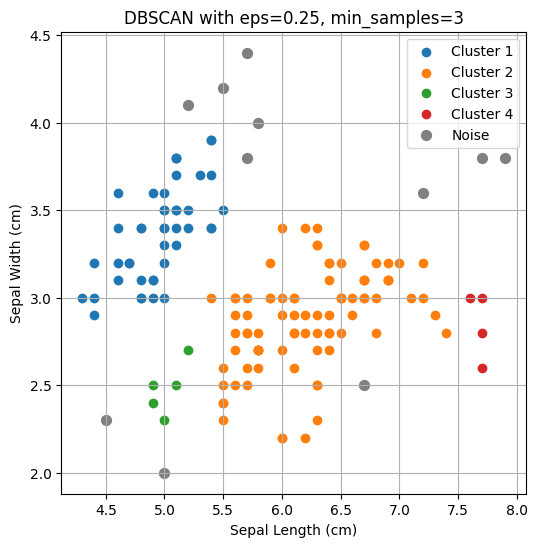

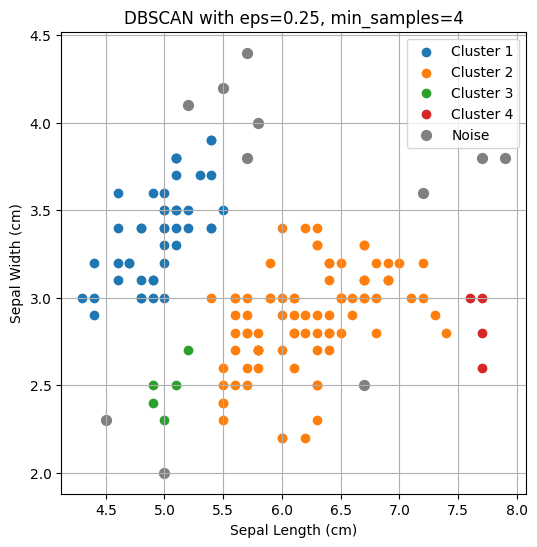

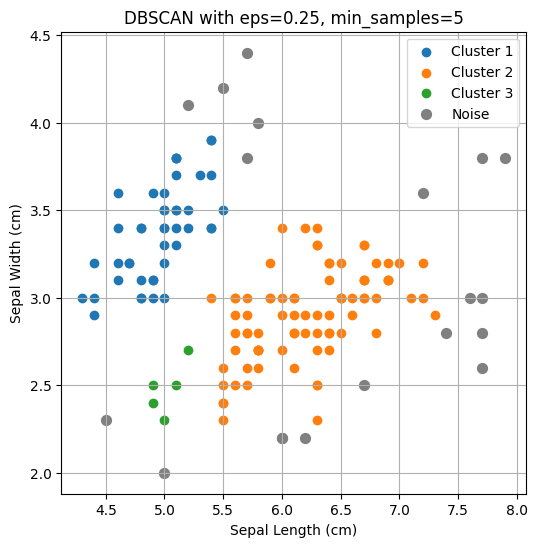

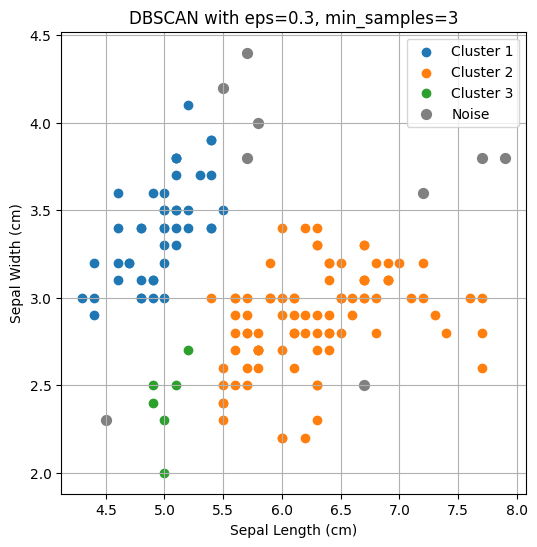

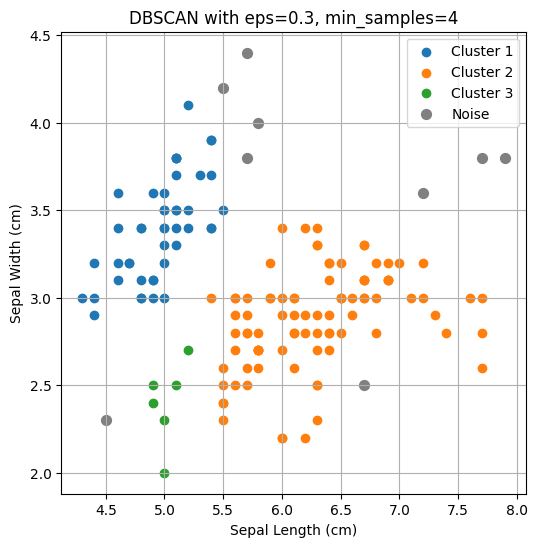

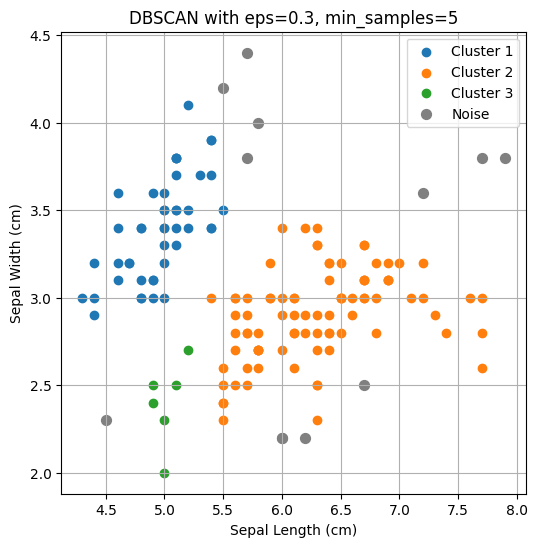

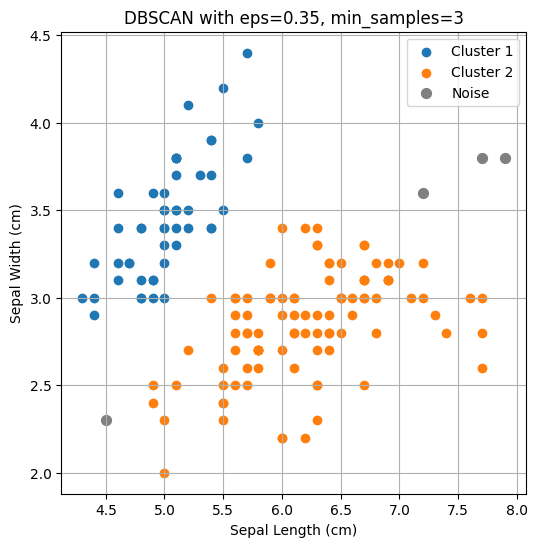

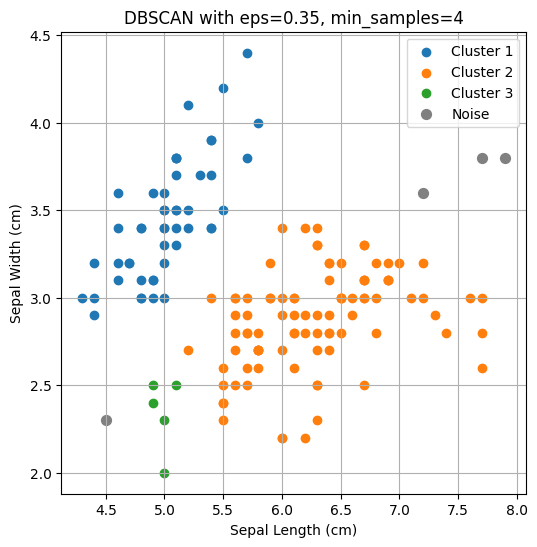

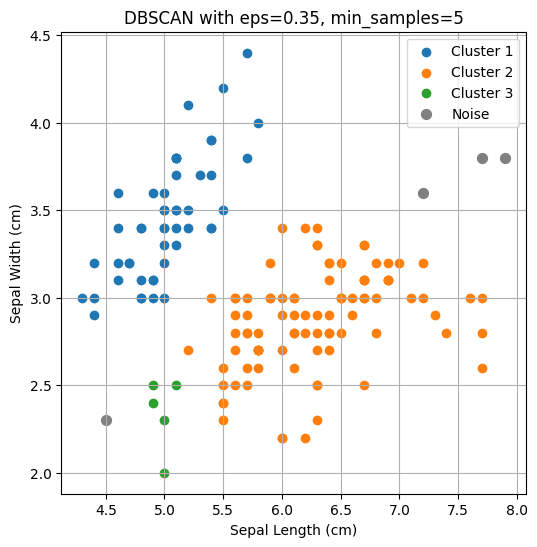

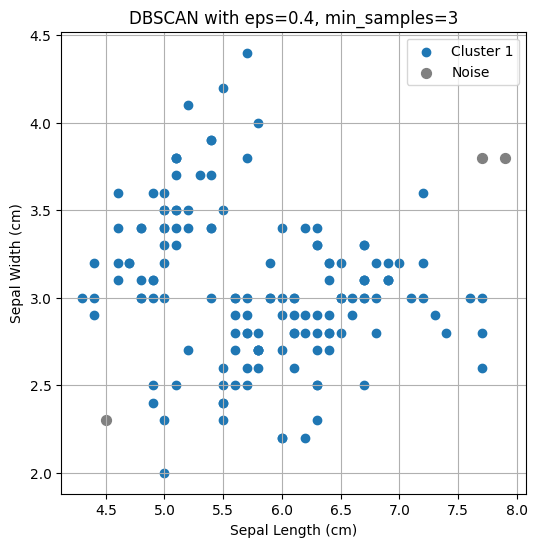

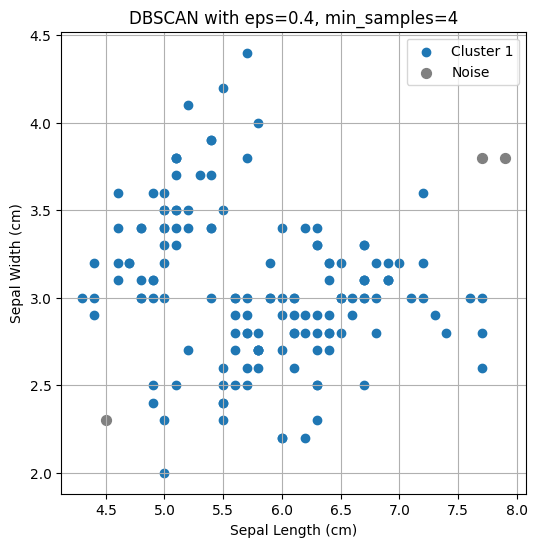

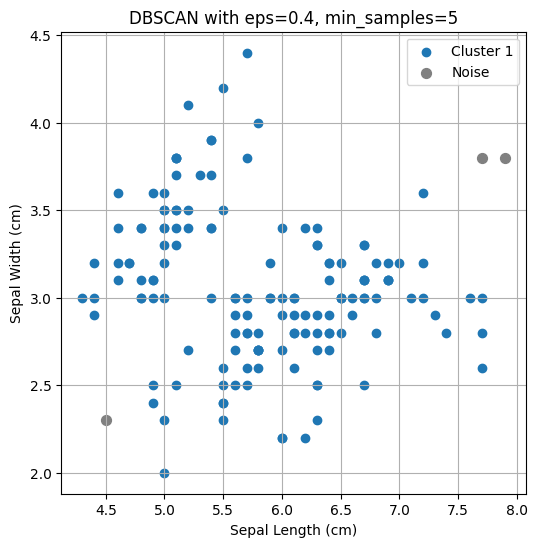

In [20]:
# Tune DBSCAN parameters
for eps in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]:
    for min_samples in [3, 4, 5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        unique_labels = set(labels)

        plt.figure(figsize=(6, 6))
        for label in unique_labels:
            if label == -1:
                plt.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
            else:
                plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')
        plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}')
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Sepal Width (cm)')
        plt.legend()
        plt.grid()
        plt.show()

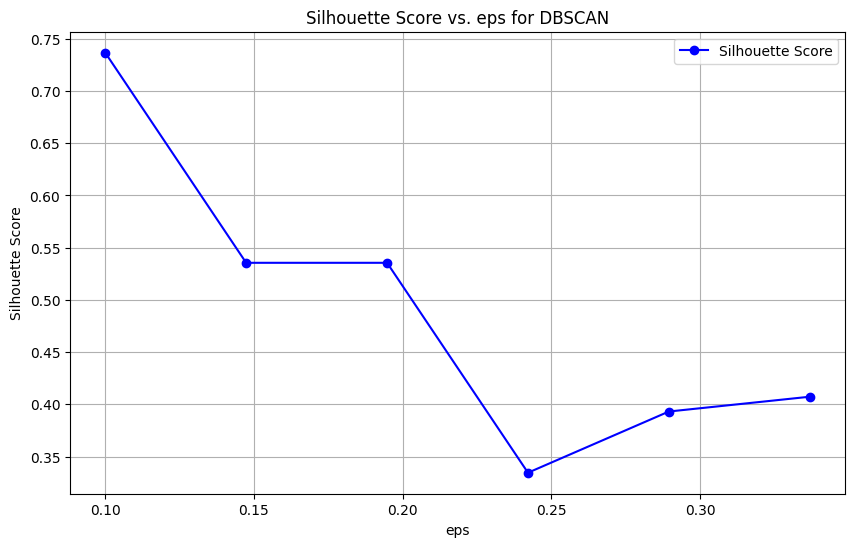

In [28]:
# Define a range of eps values to try
eps_values = np.linspace(0.1, 1.0, 20)  # Adjust range as needed
silhouette_scores = []

# Loop over eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(X)
    
    # Check if there are at least 2 clusters (excluding noise)
    if len(set(labels) - {-1}) > 1:
        # Filter out noise points for silhouette score calculation
        filtered_X = X[labels != -1]
        filtered_labels = labels[labels != -1]
        sil_score = silhouette_score(filtered_X, filtered_labels)
        silhouette_scores.append(sil_score)
    else:
        # Assign NaN for cases where silhouette score cannot be computed
        silhouette_scores.append(np.nan)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.title('Silhouette Score vs. eps for DBSCAN')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()

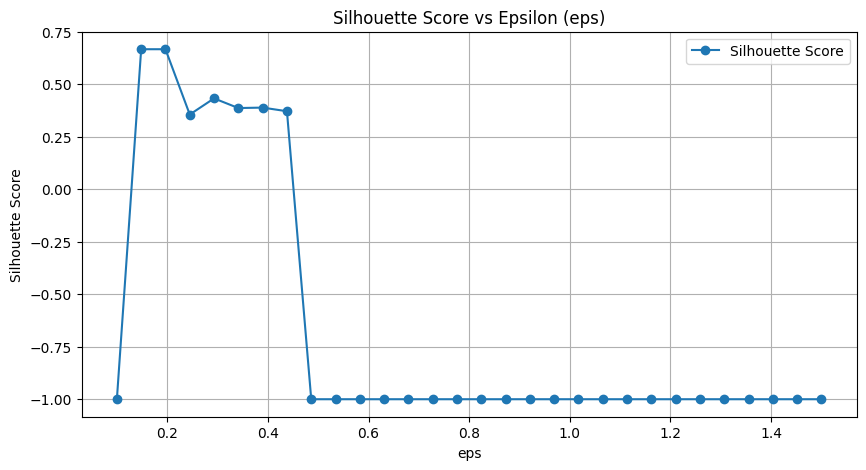

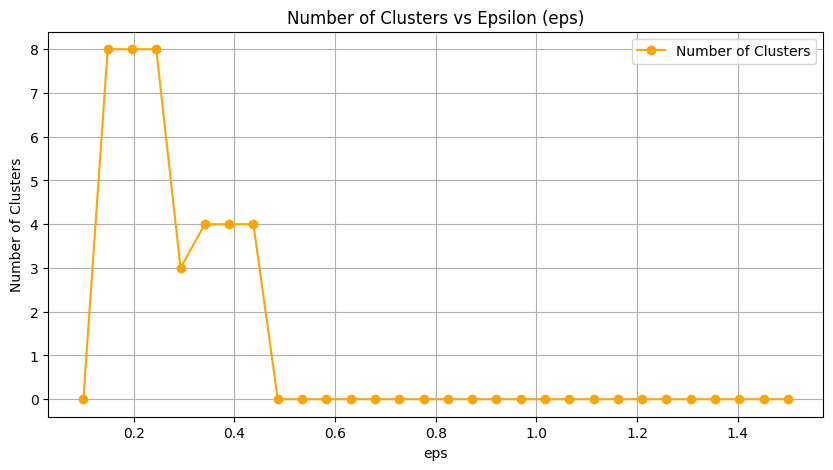

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaled_X = StandardScaler().fit_transform(X)

# Range of eps values to test
eps_values = np.linspace(0.1, 1.5, 30)

silhouette_scores = []
num_clusters = []

# Test different eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(scaled_X)

    # Filter out noise points (-1)
    if len(set(labels) - {-1}) > 1:
        filtered_labels = labels[labels != -1]
        filtered_X = scaled_X[labels != -1]

        # Compute silhouette score
        sil_score = silhouette_score(filtered_X, filtered_labels)
        silhouette_scores.append(sil_score)
        num_clusters.append(len(set(filtered_labels)))  # Exclude noise (-1)
    else:
        # Assign -1 for silhouette score and cluster count if no valid clusters
        silhouette_scores.append(-1)
        num_clusters.append(0)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Epsilon (eps)')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Plot number of clusters
plt.figure(figsize=(10, 5))
plt.plot(eps_values, num_clusters, marker='o', color='orange', label='Number of Clusters')
plt.title('Number of Clusters vs Epsilon (eps)')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.legend()
plt.grid()
plt.show()


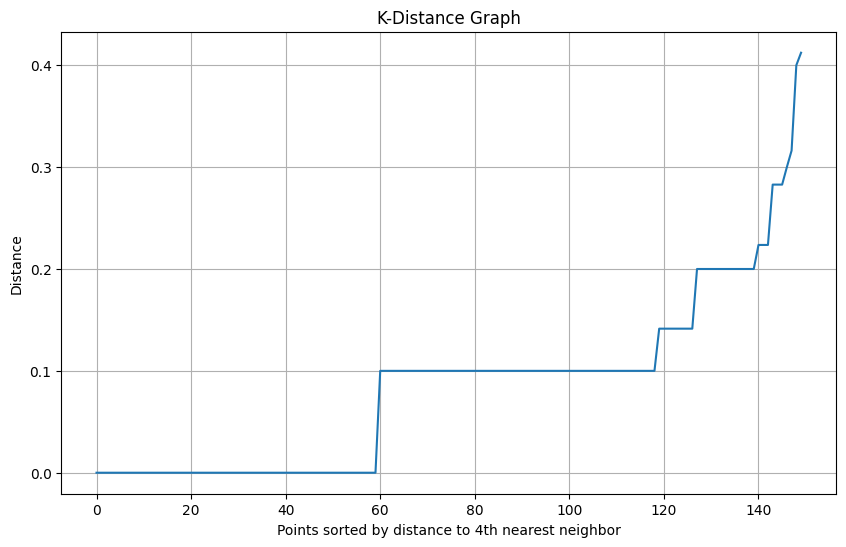

In [37]:
from sklearn.neighbors import NearestNeighbors

#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

MinPts = 4
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances in ascending order
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Use the second column (1st neighbor distance excluded)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance to {}th nearest neighbor".format(MinPts))
plt.ylabel("Distance")
plt.grid()
plt.show()

<h1><center>Conceptual Questions (5 Marks)</center></h1>

### Question 1 (3 Marks):
1. Explain the Elbow Method for determining the number of clusters in K-Means.
2. Suppose you applied K-Means clustering to a dataset and plotted the SSE for cluster counts
1 through 10. You observe a significant "elbow" at K=4. What does this suggest about the
dataset? Why?

### Question 2 (3 Marks):
1. Refer to the dendrogram below (Hierarchical Clustering – Complete Linkage). How many
clusters are formed if the dendrogram is cut at a distance of 0.6? (1.5 points)

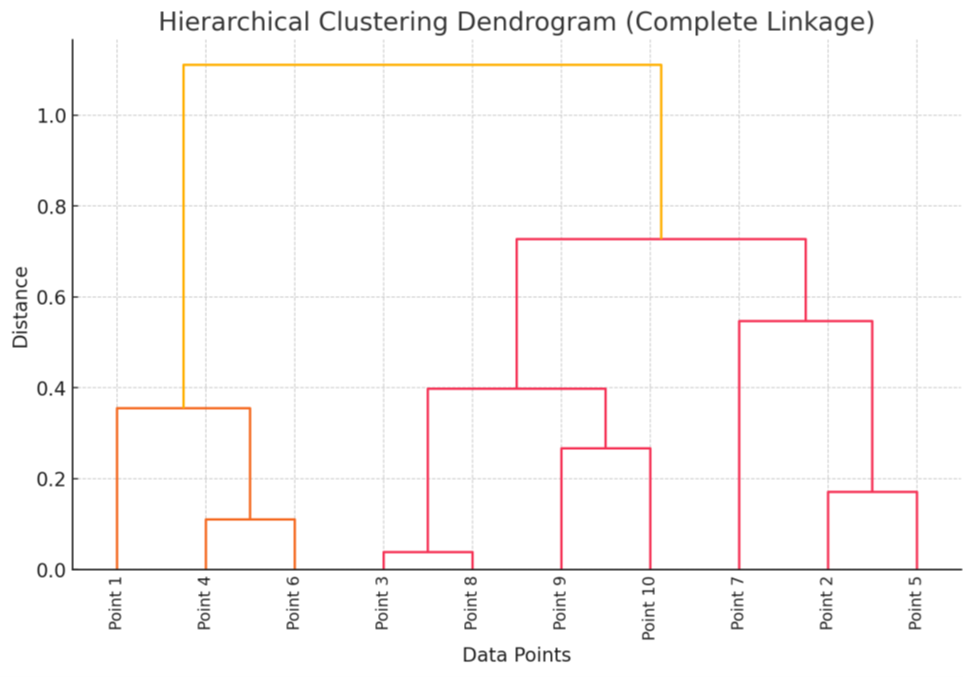

In [5]:
from IPython.display import Image, display
display(Image(filename='Dendogram.png'))

2. Explain how the choice of linkage method (e.g., single, complete, average) affects the
results (compare the 3 methods in terms of two aspects, e.g., cluster shape, sensitivity to
noise, etc.). (1.5 points)